In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv("HPD_Crime_2009_2017_v01.csv")

In [3]:
df["month"] = pd.to_datetime(df.Date_Reported, infer_datetime_format=True).dt.month

In [4]:
df.head()

Location_Desc Police_Beat Street_Type  RecordID Date_Reported  \
0                   NaN       14D40          RD         1           NaN   
1                   NaN        7C20         NaN         2           NaN   
2                   NaN       13D40        PKWY         3           NaN   
3                   NaN       18F40          RD         4           NaN   
4  RESTAURANT/CAFETERIA       24C60        PKWY         5    09/08/1914   

  Offense_Type  Block_Range Street_Prefix   Street_Name  Num_Offenses  ...  \
0     Burglary    5600-5699           NaN      SELINSKY             1  ...   
1        Theft    3900-3999           NaN     CAVALCADE             1  ...   
2        Theft    8500-8599             S   SAM HOUSTON             1  ...   
3      Robbery    2700-2799           NaN       DUNVALE             1  ...   
4     Burglary  12700-12799             W  LAKE HOUSTON             1  ...   

           Y       GEOID10       GEOID00     Police_Division  CTA_ID  \
0  29.637514  4.820133e+14  4.820133e+14  Southeast Division    K066   
1  29.800081  4.820121e+14  4.820121e+14  Northeast Division    K004   
2  29.625560  4.820133e+14  4.820133e+14  Southwest Division    K070   
3  29.736820  4.820143e+14  4.820143e+14    Midwest Division    K080   
4  29.924672  4.820125e+14  4.820125e+14   Kingwood Division    K106   

           CTA_Name  Geocoded Location_Code Hour month  
0          Minnetex         1           NaN    8   NaN  
1  Kashmere Gardens         1           NaN   11   NaN  
2      Five Corners         1           NaN   15   NaN  
3          Mid-West         1           NaN   14   NaN  
4      Lake Houston         1           210    7   9.0  

[5 rows x 24 columns]

In [5]:
df.month.value_counts()

7.0     101901
8.0     101137
12.0     98471
10.0     97767
6.0      95481
9.0      94322
11.0     93415
5.0      89213
1.0      85950
4.0      83363
3.0      81383
2.0      71800
Name: month, dtype: int64

Text(0, 0.5, 'frequency of crime')

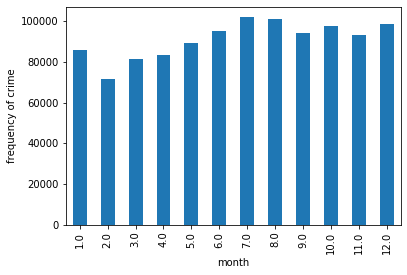

In [6]:
plot = df.month.value_counts().sort_index().plot.bar()
plot.set_xlabel("month")
plot.set_ylabel("frequency of crime")

In [7]:
newDF = df[df.Offense_Type != "1"]

In [8]:
grouped = newDF.groupby(["Offense_Type", "month"])

In [9]:
graphs = grouped["Num_Offenses"].count()

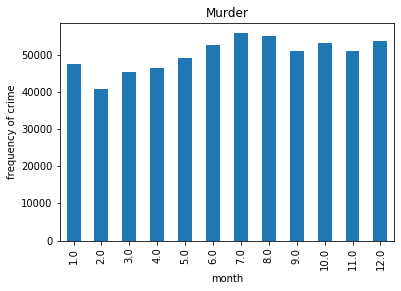

In [16]:
for offense_type in newDF.Offense_Type.unique():
    plot = graphs[offense_type].plot.bar()
    plot.set_xlabel("month")
    plot.set_ylabel("frequency of crime")
    plot.set_title(offense_type)
    fig = plot.get_figure()
    fig.savefig(str(offense_type) + ".png")